<a href="https://colab.research.google.com/github/Naimish240/TwitchEmoteGenerator/blob/main/TwitchEmotesEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitch Emotes EDA**
***
By : [Naimish Mani B](https://www.linkedin.com/in/naimish-balaji-a6182b180/)
***

Dataset:
A collection of almost 94k emotes sized at 56x56 collected using the Twitch API.

# **Introduction**


In the new version of their API, Twitch now lets users get all the emotes from a channel through a simple to use and neatly packeged endpoint. I have already done this locally, and uploaded the final results to my drive.

So, lets first download and extract the dataset from drive.

In [ ]:
!gdown --id 1wz2RtNrWHk4jfYWuQRjXEd2W35g9Cgb9
!gdown --id 1UsqG-8DdXY3uuii-RTU2VFLTjowm5zu8
!gdown --id 1iGwB8XpOu7BaJQ3zfgbfZSu0ou5MlqLs

Downloading...
From: https://drive.google.com/uc?id=1wz2RtNrWHk4jfYWuQRjXEd2W35g9Cgb9
To: /content/emote_dataset.zip
634MB [00:05, 112MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UsqG-8DdXY3uuii-RTU2VFLTjowm5zu8
To: /content/details.csv
13.1MB [00:00, 41.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1iGwB8XpOu7BaJQ3zfgbfZSu0ou5MlqLs
To: /content/id_to_name_dict
100% 781k/781k [00:00<00:00, 12.4MB/s]


In [ ]:
!mkdir emotes_dataset
!unzip emote_dataset.zip -d emotes_dataset
!rm emote_dataset.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Understanding the Dataset**

There are two parts of the dataset; namely
1. `details.csv`, which contains the details about the emotes
2. `emotes_dataset`, which is a folder that contains all the actual emotes.



## Dataset Details

First, let's take a look at the csv file to get a rough lay of the land we're working with.

In [ ]:
import pandas as pd
import pickle

with open('id_to_name_dict', 'rb') as fp:
  ids = pickle.load(fp)

df = pd.read_csv('details.csv')
df = df.drop(columns=['Unnamed: 0'])

uname = []
for name in list(df.uid):
  uname.append(ids[str(name)])

df['uname'] = uname
df.head()

,uid,eid,ename,image_url,tier,emote_type,emote_set,uname
0,51950404,300911912,wtcnReyc,https://static-cdn.jtvnw.net/emoticons/v2/3009...,1000.0,subscriptions,3746,wtcN
1,51950404,1471097,wtcnAna,https://static-cdn.jtvnw.net/emoticons/v2/1471...,1000.0,subscriptions,3746,wtcN
2,51950404,417769,wtcnOz,https://static-cdn.jtvnw.net/emoticons/v2/4177...,1000.0,subscriptions,3746,wtcN
3,51950404,300911891,wtcnCool,https://static-cdn.jtvnw.net/emoticons/v2/3009...,1000.0,subscriptions,3746,wtcN
4,51950404,300911911,wtcnH,https://static-cdn.jtvnw.net/emoticons/v2/3009...,1000.0,subscriptions,3746,wtcN


In [ ]:
print(f"Unique Emotes: {len(df.ename.unique())}")
print(f"Unique Streamers: {len(df.uname.unique())}")
print(f'Unique emote types: {len(df.emote_type.unique())}, {df.emote_type.unique()}')
print(f"Number of subscription emotes: {len(df[df.emote_type == 'subscriptions'])}")
print(f"Number of follower emotes: {len(df[df.emote_type == 'follower'])}")
print(f"Number of bitstier emotes: {len(df[df.emote_type == 'bitstier'])}")

Unique Emotes: 93897
Unique Streamers: 6287
Unique emote types: 3, ['subscriptions' 'follower' 'bitstier']
Number of subscription emotes: 89055
Number of follower emotes: 557
Number of bitstier emotes: 4285


Next, let's look at the statistics behind the streamers and number of emotes they have.

In [ ]:
stats = pd.DataFrame([len(df[df.uname == uname]) for uname in list(df.uname.unique())])
print(stats.describe())
del stats

                 0
count  6287.000000
mean     14.935104
std      18.059873
min       1.000000
25%       3.000000
50%       6.000000
75%      23.000000
max      93.000000


## Dataset Images

Next, let's take a look at the images present in the dataset.

In [ ]:
import matplotlib.pyplot as plt
import PIL
import numpy as np
import glob

In [ ]:
image_paths = glob.glob('emotes_dataset/content/images/*.png')
len(image_paths)

93897

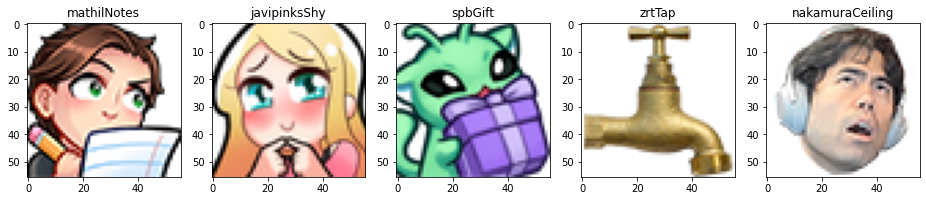

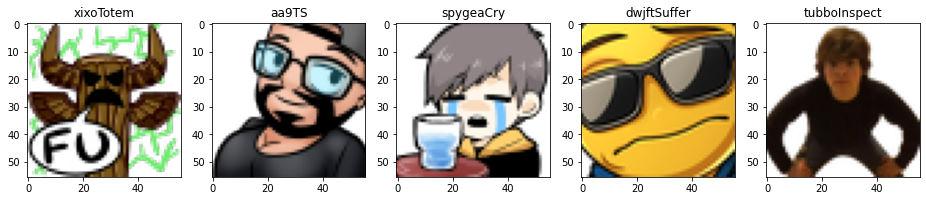

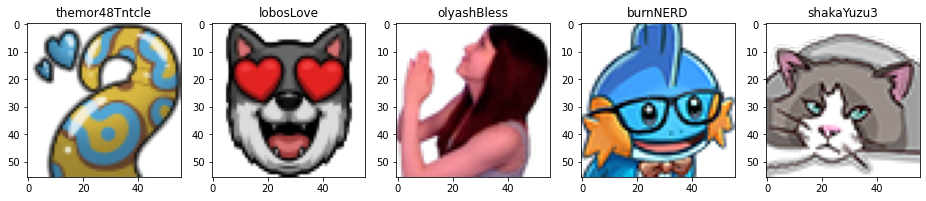

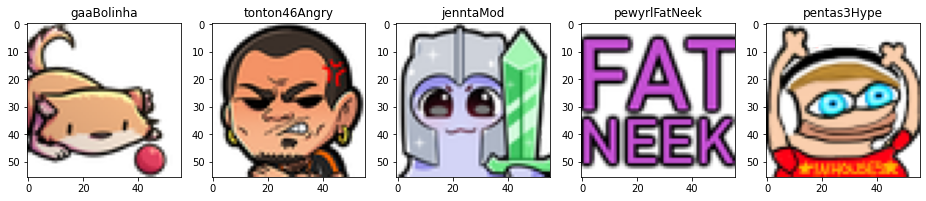

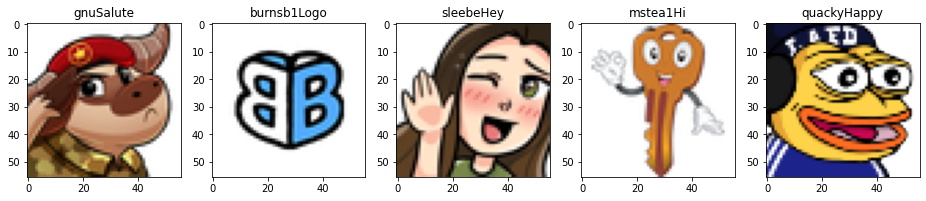

In [ ]:
for i in range(5):
  plt.figure(figsize=(16, 8))

  plt.subplot(1,5,1)
  plt.title(image_paths[5*i+0][30:-4])
  plt.imshow(PIL.Image.open(image_paths[5*i+0]))

  plt.subplot(1,5,2)
  plt.title(image_paths[5*i+1][30:-4])
  plt.imshow(PIL.Image.open(image_paths[5*i+1]))

  plt.subplot(1,5,3)
  plt.title(image_paths[5*i+2][30:-4])
  plt.imshow(PIL.Image.open(image_paths[5*i+2]))

  plt.subplot(1,5,4)
  plt.title(image_paths[5*i+3][30:-4])
  plt.imshow(PIL.Image.open(image_paths[5*i+3]))

  plt.subplot(1,5,5)
  plt.title(image_paths[5*i+4][30:-4])
  plt.imshow(PIL.Image.open(image_paths[5*i+4]))

  plt.show()

From this, we can see that we have a very diverse image dataset to work with.

In [ ]:
image_paths = glob.glob('emotes_dataset/content/images/*.png')
len(image_paths)

93897

In [ ]:
# Removing this image because it can't be opened for some reason
image_paths.remove('emotes_dataset/content/images/wtcnGoldrekt.png')
print(len(image_paths))

93896


In [ ]:
tokens = [i[len("emotes_dataset/content/images/"):-4] for i in image_paths]